In [2]:
import qiskit
import numpy as np
import math
import matplotlib.pyplot as plt
import pickle

from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from numpy import pi

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
qiskit.__version__

'0.15.1'

In [3]:
qiskit.__qiskit_version__

{'qiskit-terra': '0.15.1',
 'qiskit-aer': '0.6.1',
 'qiskit-ignis': '0.4.0',
 'qiskit-ibmq-provider': '0.8.0',
 'qiskit-aqua': '0.7.5',
 'qiskit': '0.20.0'}

In [4]:
qiskit.IBMQ.save_account('96eb6fdc1c3d8661911c1cf9899e0335dfebbfcaddf93754252ac129d6cfa8a0fb0d5b33439c741cacffab22cda9c28a5adea3ec064cf9ff5919b329f48c89a1')

configrc.store_credentials:WARNING:2020-08-21 11:20:23,314: Credentials already present. Set overwrite=True to overwrite.


# QUANTUM ERASER EXPERIMENT

The quantum eraser is an experiment that invites to reflecting on the nature of entanglement. Its most straightforward interpretation would be that, thanks to quantum mechanics, the collapse produced by a measurement could be erased by the application of operators to an entangled element.

Determining the path of a photon after a passing a double slit would supress the interference pattern. Since this knowledge or measurement is achieved through an entangled photon, one could assumed that there is instant communication between detectors. The truth is that in experimental realizations, a good study of the data must be done in order to filter noise and determine the correct timing of events.

## A CLASSICAL EXPERIMENT THAT EMULATES A QUANTUM ERASER

The setup relies in the properties of light. If you have a laser, chances are that the emission will be linearly polarized. To emulate a superposition of states, a quarter-wave plate is used, so the light beam becomes circularly polarized (your state would be 1/Sqrt(2)( |L> + |R> ).

Pointing this beam to a double slit will generate an interference pattern in a screen placed behind. Interference is ruled by phase difference between waves arriving to the same point.

Now, if a polarizer was placed after each slit, and their axis were perpendicular, that would mean we know what path did each wave chose before arriving to the screen. This measurement destroys the interference pattern and a light spot is observed.

Is it possible to erase this 'measurement'? If another polarizer is placed after the previous two, with its axis forming 45° to theirs (remember they were perpendicular to each other), the components surviving this polarizer would make the original slit indistinguishable, thus restoring the interference pattern.

## REPRODUCING THIS EXPERIMENT WITH QUANTUM CIRCUITS

Let us build qiskit circuits that take the ideas from that previous experiment. Some theoretical computation will be included.

Our light beam will be q_0. At some moment there will be some divergence because we have to rely on entanglement instead of having polarizers.

The laser with linear polarization will be |0>. The quarter-wave plate, that changes the state to a different base, will be emulated by a Hadamard gate, which will deliver q_0 = |+> = (1/Sqrt(2))( |0> + |1> ).

In [5]:
bra_0 = np.array([[1],[0]], dtype=np.complex_)
H = (1/math.sqrt(2))*np.array([[1,1],[1,-1]])
q_0 = H.dot(bra_0)
np.set_printoptions(suppress=True)
print('Theoretical state of q_0:\n', q_0)

Theoretical state of q_0:
 [[0.70710678+0.j]
 [0.70710678+0.j]]


In [6]:
backend = qiskit.Aer.get_backend('statevector_simulator'); # Tell Qiskit how to simulate our circuit

qreg_q = QuantumRegister(1, 'q')
creg_c = ClassicalRegister(1, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)

circuit.reset(qreg_q[0])
circuit.h(qreg_q[0])
state = qiskit.execute(circuit,backend).result().get_statevector(); # Execute the circuit
circuit_1 = qiskit.visualization.circuit_drawer(circuit)
print(circuit_1)
print('State of q_0: ',state);           # Print the result

          ┌───┐
q_0: ─|0>─┤ H ├
          └───┘
c: 1/══════════
               
State of q_0:  [0.70710678+0.j 0.70710678+0.j]


The next step would be passing it through the double slit. As stated before, the interference originated from a double slit comes from the phase difference between waves crossing different paths. Here we apply an operator that gets the |+> we have and adds a phase within its components |0> and |1>. The appropriate operator to act in such a base is R_z(phi).

In [7]:
print('Theory\n','Before applying the rotation: \n', q_0, '\n')

def Rz(phi):
    return np.array([[1, 0],[0, math.e**(1j*phi)]], dtype=np.complex_)

# We will try different phases
q_0_a = Rz(np.pi/2).dot(q_0)
print('After applying a PI/2 rotation \n', q_0_a,'\n')

q_0_b = Rz(np.pi).dot(q_0)
print('After applying a PI rotation \n', q_0_b,'\n')

q_0_c = Rz(np.pi/3).dot(q_0)
print('After applying a PI/3 rotation \n', q_0_c,)

Theory
 Before applying the rotation: 
 [[0.70710678+0.j]
 [0.70710678+0.j]] 

After applying a PI/2 rotation 
 [[0.70710678+0.j        ]
 [0.        +0.70710678j]] 

After applying a PI rotation 
 [[ 0.70710678+0.j]
 [-0.70710678+0.j]] 

After applying a PI/3 rotation 
 [[0.70710678+0.j        ]
 [0.35355339+0.61237244j]]


In [8]:
qreg_q = QuantumRegister(1, 'q')
creg_c = ClassicalRegister(1, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)

circuit.reset(qreg_q[0])
circuit.h(qreg_q[0])
circuit.rz(pi/2, qreg_q[0])

state = qiskit.execute(circuit,backend).result().get_statevector(); # Execute the circuit
circuit_1 = qiskit.visualization.circuit_drawer(circuit)
print(circuit_1)
print('State of q_0: ',state);           # Print the result

circuit = QuantumCircuit(qreg_q, creg_c)

circuit.reset(qreg_q[0])
circuit.h(qreg_q[0])
circuit.rz(pi, qreg_q[0])

state = qiskit.execute(circuit,backend).result().get_statevector(); # Execute the circuit
circuit_1 = qiskit.visualization.circuit_drawer(circuit)
print(circuit_1)
print('State of q_0: ',state);           # Print the result

circuit = QuantumCircuit(qreg_q, creg_c)

circuit.reset(qreg_q[0])
circuit.h(qreg_q[0])
circuit.rz(pi/3, qreg_q[0])

state = qiskit.execute(circuit,backend).result().get_statevector(); # Execute the circuit
circuit_1 = qiskit.visualization.circuit_drawer(circuit)
print(circuit_1)
print('State of q_0: ',state);           # Print the result

          ┌───┐┌──────────┐
q_0: ─|0>─┤ H ├┤ RZ(pi/2) ├
          └───┘└──────────┘
c: 1/══════════════════════
                           
State of q_0:  [0.70710678+0.j         0.        +0.70710678j]
          ┌───┐┌────────┐
q_0: ─|0>─┤ H ├┤ RZ(pi) ├
          └───┘└────────┘
c: 1/════════════════════
                         
State of q_0:  [ 0.70710678+0.j -0.70710678+0.j]
          ┌───┐┌──────────┐
q_0: ─|0>─┤ H ├┤ RZ(pi/3) ├
          └───┘└──────────┘
c: 1/══════════════════════
                           
State of q_0:  [0.70710678+0.j         0.35355339+0.61237244j]


We are ready now to create the interference. As the documentation suggests, this is represented by applying another Hadamard gate to our circuit. Let us recall that two H operators are just the identity.

In [9]:
print('Theory\n','Before interfering, the states of q_0 are: \n Pi/2 rotation\n', q_0_a, '\n\n Pi rotation\n', q_0_b, '\n\n Pi/3 rotation\n',
      q_0_c, '\n\nThe interference result will depend'
      ' on phi, which would prove the pattern depending on the phase, that is why we show the three cases.')

q_0_aa = H.dot(q_0_a)
q_0_bb = H.dot(q_0_b)
q_0_cc = H.dot(q_0_c)

print('\nAfter the H interference, the states of q_0 are: \n\n', 'Pi/2 rotation\n', q_0_aa, '\n\n Pi rotation\n', q_0_bb, '\n\n Pi/3 rotation\n',
      q_0_cc)

Theory
 Before interfering, the states of q_0 are: 
 Pi/2 rotation
 [[0.70710678+0.j        ]
 [0.        +0.70710678j]] 

 Pi rotation
 [[ 0.70710678+0.j]
 [-0.70710678+0.j]] 

 Pi/3 rotation
 [[0.70710678+0.j        ]
 [0.35355339+0.61237244j]] 

The interference result will depend on phi, which would prove the pattern depending on the phase, that is why we show the three cases.

After the H interference, the states of q_0 are: 

 Pi/2 rotation
 [[0.5+0.5j]
 [0.5-0.5j]] 

 Pi rotation
 [[0.+0.j]
 [1.-0.j]] 

 Pi/3 rotation
 [[0.75+0.4330127j]
 [0.25-0.4330127j]]


Let us see if the quantum circuits prove these results:

In [10]:
qreg_q = QuantumRegister(1, 'q')
creg_c = ClassicalRegister(1, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)

circuit.reset(qreg_q[0])
circuit.h(qreg_q[0])
circuit.rz(pi/2, qreg_q[0])
circuit.h(qreg_q[0])

state_a = qiskit.execute(circuit,backend).result().get_statevector(); # Execute the circuit
circuit_1 = qiskit.visualization.circuit_drawer(circuit)
print(circuit_1)
print('State of q_0: ',state_a);           # Print the result

circuit = QuantumCircuit(qreg_q, creg_c)

circuit.reset(qreg_q[0])
circuit.h(qreg_q[0])
circuit.rz(pi, qreg_q[0])
circuit.h(qreg_q[0])

state_b = qiskit.execute(circuit,backend).result().get_statevector(); # Execute the circuit
circuit_1 = qiskit.visualization.circuit_drawer(circuit)
print(circuit_1)
print('State of q_0: ',state_b);           # Print the result

circuit = QuantumCircuit(qreg_q, creg_c)

circuit.reset(qreg_q[0])
circuit.h(qreg_q[0])
circuit.rz(pi/3, qreg_q[0])
circuit.h(qreg_q[0])

state_c = qiskit.execute(circuit,backend).result().get_statevector(); # Execute the circuit
circuit_1 = qiskit.visualization.circuit_drawer(circuit)
print(circuit_1)
print('State of q_0: ',state_c);           # Print the result

          ┌───┐┌──────────┐┌───┐
q_0: ─|0>─┤ H ├┤ RZ(pi/2) ├┤ H ├
          └───┘└──────────┘└───┘
c: 1/═══════════════════════════
                                
State of q_0:  [0.5+0.5j 0.5-0.5j]
          ┌───┐┌────────┐┌───┐
q_0: ─|0>─┤ H ├┤ RZ(pi) ├┤ H ├
          └───┘└────────┘└───┘
c: 1/═════════════════════════
                              
State of q_0:  [0.+0.j 1.-0.j]
          ┌───┐┌──────────┐┌───┐
q_0: ─|0>─┤ H ├┤ RZ(pi/3) ├┤ H ├
          └───┘└──────────┘└───┘
c: 1/═══════════════════════════
                                
State of q_0:  [0.75+0.4330127j 0.25-0.4330127j]


And show the probabilities associated to measuring either |0> or |1>:

In [11]:
Prob_pi_half_0 = np.abs(np.array([1,0], dtype=np.complex_).dot(state_a))**2
print('Probability of |0> when applying a Pi/2 rotation: ', Prob_pi_half_0)
Prob_pi_half_1 = np.abs(np.array([0,1], dtype=np.complex_).dot(state_a))**2
print('Probability of |1> when applying a Pi/2 rotation: ', Prob_pi_half_1)

Prob_pi_0 = np.abs(np.array([1,0], dtype=np.complex_).dot(state_b))**2
print('\nProbability of |0> when applying a Pi rotation: ', Prob_pi_0)
Prob_pi_1 = np.abs(np.array([0,1], dtype=np.complex_).dot(state_b))**2
print('Probability of |1> when applying a Pi rotation: ', Prob_pi_1)

Prob_pi_third_0 = np.abs(np.array([1,0], dtype=np.complex_).dot(state_c))**2
print('\nProbability of |0> when applying a Pi/3 rotation: ', Prob_pi_third_0)
Prob_pi_third_1 = np.abs(np.array([0,1], dtype=np.complex_).dot(state_c))**2
print('Probability of |1> when applying a Pi/3 rotation: ', Prob_pi_third_1)

Probability of |0> when applying a Pi/2 rotation:  0.5000000000000001
Probability of |1> when applying a Pi/2 rotation:  0.4999999999999999

Probability of |0> when applying a Pi rotation:  6.430140440293182e-32
Probability of |1> when applying a Pi rotation:  1.0

Probability of |0> when applying a Pi/3 rotation:  0.7499999999999999
Probability of |1> when applying a Pi/3 rotation:  0.2499999999999999


We can see that Prob_|0> = 1/2 (1 + cos(Phi)), the expected theoretical result.

As a reminder, the laser setup can show the phase difference as a distance from the central axis (in the screen), showing an interference. Here we will have to simulate different phases and build a histogram to show the equivalent interference pattern, according to Phi.

### THE WAY TO KNOW WHICH SLIT WAS CHOSEN, THE ENTANGLEMENT

The documentation shows that the way to build an entangled state with a second qubit is through the application of a CNOT gate. To achieve the maximum entanglement, the sequence should be H - CNOT, which defines a Bell state, thus entangling before the Rz(Phi) operator.

However, we can see that, for our classical laser, the knowledge of the path came after the slit, where the polarizators were placed. Can we place our CNOT after the rotation? Let us study the commutator of these operators

In [12]:
print('We will use Pi/3 to avoid any cancellation\n')

CNOT = np.array([[1, 0, 0, 0],[0, 0, 0, 1],[0, 0, 1, 0],[0, 1, 0, 0]])
print('CNOT =\n', CNOT)
print('\nThe rotation acts on q_0 but not in q_1, the qubit we are goint to entangle to it'
      '\nA kronecker product will be executed against the identity matrix, respecting the q_1 x q_0 notation')

new_Rz = np.kron(np.array([[1, 0],[0, 1]]), Rz(np.pi/3))
print('\nRz_4 = I x Rz =\n',new_Rz)

print('\nCNOT . Rz_4 =\n', CNOT.dot(new_Rz))
print('\nRz_4 . CNOT =\n', new_Rz.dot(CNOT))

print('\nAs we can see, the operators commute, so we will place the CNOT after the rotation, just to stick to'
     'the laser experimental setup.')

We will use Pi/3 to avoid any cancellation

CNOT =
 [[1 0 0 0]
 [0 0 0 1]
 [0 0 1 0]
 [0 1 0 0]]

The rotation acts on q_0 but not in q_1, the qubit we are goint to entangle to it
A kronecker product will be executed against the identity matrix, respecting the q_1 x q_0 notation

Rz_4 = I x Rz =
 [[1. +0.j        0. +0.j        0. +0.j        0. +0.j       ]
 [0. +0.j        0.5+0.8660254j 0. +0.j        0. +0.j       ]
 [0. +0.j        0. +0.j        1. +0.j        0. +0.j       ]
 [0. +0.j        0. +0.j        0. +0.j        0.5+0.8660254j]]

CNOT . Rz_4 =
 [[1. +0.j        0. +0.j        0. +0.j        0. +0.j       ]
 [0. +0.j        0. +0.j        0. +0.j        0.5+0.8660254j]
 [0. +0.j        0. +0.j        1. +0.j        0. +0.j       ]
 [0. +0.j        0.5+0.8660254j 0. +0.j        0. +0.j       ]]

Rz_4 . CNOT =
 [[1. +0.j        0. +0.j        0. +0.j        0. +0.j       ]
 [0. +0.j        0. +0.j        0. +0.j        0.5+0.8660254j]
 [0. +0.j        0. +0.j        1. +0.

We proceed to include a q_1 = |0> qubit in the circuit. From now one, to simplify the book, we will stick to the rotation of Pi/3 in the theoretical study.

We locate ourselves after the rotation and before the second H gate is applied. There are no changes in q_1 yet. The Kronecker product of q_1 x q_0 will be:

In [13]:
q_1 = np.array([[1],[0]])
print('q_0 = \n', q_0_c)
print('q_1 = \n', q_1)

q_1xq_0 = np.kron(q_1, q_0_c)

print('Composed state q_1 x q_0 = \n', q_1xq_0)

q_0 = 
 [[0.70710678+0.j        ]
 [0.35355339+0.61237244j]]
q_1 = 
 [[1]
 [0]]
Composed state q_1 x q_0 = 
 [[0.70710678+0.j        ]
 [0.35355339+0.61237244j]
 [0.        +0.j        ]
 [0.        +0.j        ]]


Using qiskit circuit simulator:

In [14]:
qreg_q = QuantumRegister(2, 'q')
creg_c = ClassicalRegister(2, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)

circuit.reset(qreg_q[0])
circuit.h(qreg_q[0])
circuit.rz(pi/3, qreg_q[0])


state = qiskit.execute(circuit,backend).result().get_statevector(); # Execute the circuit
circuit_1 = qiskit.visualization.circuit_drawer(circuit)
print(circuit_1)
print('State of q_1 x q_0: \n',state);           # Print the result

          ┌───┐┌──────────┐
q_0: ─|0>─┤ H ├┤ RZ(pi/3) ├
          └───┘└──────────┘
q_1: ──────────────────────
                           
c: 2/══════════════════════
                           
State of q_1 x q_0: 
 [0.70710678+0.j         0.35355339+0.61237244j 0.        +0.j
 0.        +0.j        ]


We are ready to place the CNOT after the rotation. Theoretically, this should deliver:

In [15]:
entangled_q1q0 = CNOT.dot(q_1xq_0)
print('Entangled state: \n', entangled_q1q0)

Entangled state: 
 [[0.70710678+0.j        ]
 [0.        +0.j        ]
 [0.        +0.j        ]
 [0.35355339+0.61237244j]]


And the qiskit circuit:

In [16]:
qreg_q = QuantumRegister(2, 'q')
creg_c = ClassicalRegister(2, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)

circuit.reset(qreg_q[0])
circuit.h(qreg_q[0])
circuit.rz(pi/3, qreg_q[0])
circuit.cx(qreg_q[0], qreg_q[1])

state = qiskit.execute(circuit,backend).result().get_statevector(); # Execute the circuit
circuit_1 = qiskit.visualization.circuit_drawer(circuit)
print(circuit_1)
print('Entangled state: \n',state);           # Print the result

          ┌───┐┌──────────┐     
q_0: ─|0>─┤ H ├┤ RZ(pi/3) ├──■──
          └───┘└──────────┘┌─┴─┐
q_1: ──────────────────────┤ X ├
                           └───┘
c: 2/═══════════════════════════
                                
Entangled state: 
 [0.70710678+0.j         0.        +0.j         0.        +0.j
 0.35355339+0.61237244j]


Now is the moment to see if, after getting knowledge from the entanglement, will have lost any phase influence in the output, destroying the interference pattern.

Theoretically:

In [17]:
print('The H gate acts only on q_0, we have to do the Kronecker product with the identity again')

new_H = np.kron(np.array([[1, 0],[0, 1]]), H)
print('\nThe new H matrix is:\n', new_H)

print('\n If we now apply it to the entangled state:\n')
interfered_entangled_q1q0 = new_H.dot(entangled_q1q0)
print('The state we have after doing this is:\n', interfered_entangled_q1q0)

The H gate acts only on q_0, we have to do the Kronecker product with the identity again

The new H matrix is:
 [[ 0.70710678  0.70710678  0.          0.        ]
 [ 0.70710678 -0.70710678  0.         -0.        ]
 [ 0.          0.          0.70710678  0.70710678]
 [ 0.         -0.          0.70710678 -0.70710678]]

 If we now apply it to the entangled state:

The state we have after doing this is:
 [[ 0.5 +0.j       ]
 [ 0.5 +0.j       ]
 [ 0.25+0.4330127j]
 [-0.25-0.4330127j]]


To obtain the probabilities of measuring |0> or |1> for q_0 first we have to understand how the base for composed states works:

In [18]:
zero = np.array([[1],[0]])
one = np.array([[0],[1]])

z_z = np.kron(zero, zero)
z_o = np.kron(zero, one)
o_z = np.kron(one, zero)
o_o = np.kron(one, one)

print('|00> =\n', z_z)
print('\n|01> =\n', z_o)
print('\n|10> =\n', o_z)
print('\n|11> =\n', o_o)

|00> =
 [[1]
 [0]
 [0]
 [0]]

|01> =
 [[0]
 [1]
 [0]
 [0]]

|10> =
 [[0]
 [0]
 [1]
 [0]]

|11> =
 [[0]
 [0]
 [0]
 [1]]


In [19]:
Prob_entangled_00 = np.abs(z_z.conjugate().transpose().dot(interfered_entangled_q1q0))**2
Prob_entangled_01 = np.abs(z_o.conjugate().transpose().dot(interfered_entangled_q1q0))**2
Prob_entangled_10 = np.abs(o_z.conjugate().transpose().dot(interfered_entangled_q1q0))**2
Prob_entangled_11 = np.abs(o_o.conjugate().transpose().dot(interfered_entangled_q1q0))**2
print('\nProbability of |00> when applying a Pi/3 rotation and then entangle: ', Prob_entangled_00)
print('\nProbability of |01> when applying a Pi/3 rotation and then entangle: ', Prob_entangled_01)
print('\nProbability of |10> when applying a Pi/3 rotation and then entangle: ', Prob_entangled_10)
print('\nProbability of |11> when applying a Pi/3 rotation and then entangle: ', Prob_entangled_11)


Probability of |00> when applying a Pi/3 rotation and then entangle:  [[0.25]]

Probability of |01> when applying a Pi/3 rotation and then entangle:  [[0.25]]

Probability of |10> when applying a Pi/3 rotation and then entangle:  [[0.25]]

Probability of |11> when applying a Pi/3 rotation and then entangle:  [[0.25]]


Yes, now we can measure 4 states, since we have two qubits. The merge the previous work with this, if we had a second qubit q_1 that had no relationship with q_0, initialized as q_1 = |0>, the previous probability measurents for Rz(Pi/3) would be |00> -> 0.75 and |01> -> 0.25, with the other two equal to 0, since no change is done to q_1

Now, doing the same with qiskit circuit simulator:

In [20]:
qreg_q = QuantumRegister(2, 'q')
creg_c = ClassicalRegister(2, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)

circuit.reset(qreg_q[0])
circuit.h(qreg_q[0])
circuit.rz(pi/3, qreg_q[0])
circuit.cx(qreg_q[0], qreg_q[1])
circuit.h(qreg_q[0])

state = qiskit.execute(circuit,backend).result().get_statevector(); # Execute the circuit
circuit_1 = qiskit.visualization.circuit_drawer(circuit)
print(circuit_1)
print('Entangled state after the interference: \n',state);           # Print the result

          ┌───┐┌──────────┐     ┌───┐
q_0: ─|0>─┤ H ├┤ RZ(pi/3) ├──■──┤ H ├
          └───┘└──────────┘┌─┴─┐└───┘
q_1: ──────────────────────┤ X ├─────
                           └───┘     
c: 2/════════════════════════════════
                                     
Entangled state after the interference: 
 [ 0.5 +0.j         0.5 +0.j         0.25+0.4330127j -0.25-0.4330127j]


Which is the same that we obtained theoretically. Thus, the same probabilities arise.

### ERASING THE PATH KNOWLEDGE

To sum up what we have until now, we have passed from an interference pattern that defined as Prob_|0> = 1/2 (1 + cos(Phi)) to, after entangling the q_0 with a second qubit, destroying this pattern. We exemplified this with a rotation of Pi/3, where Prob_|00> = 0.75 and Prob_|01> = 0.25 before the entanglement but this moved to Prob_|00> = 0.25 after entangling q_0 with q_1. This behavior is the same for any phase.

We move on now to erasing this behavior. The laser experiment erased the polarizators influences by placing another one with an axis 45° to theirs. Since we assumed that our polarizators equivalent would be the entangled q_1, we must now act on it to produce some change.

Let us recall that q_1 is defined with respect to q_0 as a consequence of the entanglement. But this is a two-way road. Can we transform q_1 as that 45° polarizator did so q_0 measurements will be affected by the Rz(Phi) rotation again? An obvious candidate to scramble with q_1 is the H gate.

Theoretically:

In [21]:
print('The new Hadamard gate only acts on q_1, the Kronecker product will now be different,\nnothing is directly acting on q_0')

new_H1 = np.kron(H,np.array([[1, 0],[0,1]]))
print('\nOur new H is:\n', new_H1)

print('\nLetting this act on the entangled state we had at the end of the previous circuit:\n')
erased_state = new_H1.dot(interfered_entangled_q1q0)
print('The state vector after the erasure is:\n', erased_state)

The new Hadamard gate only acts on q_1, the Kronecker product will now be different,
nothing is directly acting on q_0

Our new H is:
 [[ 0.70710678  0.          0.70710678  0.        ]
 [ 0.          0.70710678  0.          0.70710678]
 [ 0.70710678  0.         -0.70710678 -0.        ]
 [ 0.          0.70710678 -0.         -0.70710678]]

Letting this act on the entangled state we had at the end of the previous circuit:

The state vector after the erasure is:
 [[0.53033009+0.30618622j]
 [0.1767767 -0.30618622j]
 [0.1767767 -0.30618622j]
 [0.53033009+0.30618622j]]


The probability of each measurement is now:

In [22]:
Prob_erased_00 = np.abs(z_z.conjugate().transpose().dot(erased_state))**2
Prob_erased_01 = np.abs(z_o.conjugate().transpose().dot(erased_state))**2
Prob_erased_10 = np.abs(o_z.conjugate().transpose().dot(erased_state))**2
Prob_erased_11 = np.abs(o_o.conjugate().transpose().dot(erased_state))**2
print('\nProbability of |00> after erasing: ', Prob_erased_00)
print('\nProbability of |01> after erasing: ', Prob_erased_01)
print('\nProbability of |10> after erasing: ', Prob_erased_10)
print('\nProbability of |11> after erasing: ', Prob_erased_11)


Probability of |00> after erasing:  [[0.375]]

Probability of |01> after erasing:  [[0.125]]

Probability of |10> after erasing:  [[0.125]]

Probability of |11> after erasing:  [[0.375]]


Though this theoretical computation is only for Rz(Pi/3), the three rotations we previously saw will be done again in qiskit, as it is easy to implement.

In [23]:
qreg_q = QuantumRegister(2, 'q')
creg_c = ClassicalRegister(2, 'c')

circuit = QuantumCircuit(qreg_q, creg_c)

circuit.reset(qreg_q[0])
circuit.reset(qreg_q[1])
circuit.h(qreg_q[0])
circuit.rz(pi/2, qreg_q[0])
circuit.cx(qreg_q[0], qreg_q[1])
circuit.h(qreg_q[0])
circuit.h(qreg_q[1])

state_a = qiskit.execute(circuit,backend).result().get_statevector(); # Execute the circuit
circuit_1 = qiskit.visualization.circuit_drawer(circuit)
print(circuit_1)
print('State of q_1xq_0: \n',state_a);           # Print the result

circuit = QuantumCircuit(qreg_q, creg_c)

circuit.reset(qreg_q[0])
circuit.reset(qreg_q[1])
circuit.h(qreg_q[0])
circuit.rz(pi, qreg_q[0])
circuit.cx(qreg_q[0], qreg_q[1])
circuit.h(qreg_q[0])
circuit.h(qreg_q[1])

state_b = qiskit.execute(circuit,backend).result().get_statevector(); # Execute the circuit
circuit_1 = qiskit.visualization.circuit_drawer(circuit)
print(circuit_1)
print('State of q_1xq_0: \n',state_b);           # Print the result

circuit = QuantumCircuit(qreg_q, creg_c)

circuit.reset(qreg_q[0])
circuit.reset(qreg_q[1])
circuit.h(qreg_q[0])
circuit.rz(pi/3, qreg_q[0])
circuit.cx(qreg_q[0], qreg_q[1])
circuit.h(qreg_q[0])
circuit.h(qreg_q[1])

state_c = qiskit.execute(circuit,backend).result().get_statevector(); # Execute the circuit
circuit_1 = qiskit.visualization.circuit_drawer(circuit)
print(circuit_1)
print('State of q_1xq_0: \n',state_c);           # Print the result

          ┌───┐┌──────────┐     ┌───┐
q_0: ─|0>─┤ H ├┤ RZ(pi/2) ├──■──┤ H ├
          └───┘└──────────┘┌─┴─┐├───┤
q_1: ─|0>──────────────────┤ X ├┤ H ├
                           └───┘└───┘
c: 2/════════════════════════════════
                                     
State of q_1xq_0: 
 [0.35355339+0.35355339j 0.35355339-0.35355339j 0.35355339-0.35355339j
 0.35355339+0.35355339j]
          ┌───┐┌────────┐     ┌───┐
q_0: ─|0>─┤ H ├┤ RZ(pi) ├──■──┤ H ├
          └───┘└────────┘┌─┴─┐├───┤
q_1: ─|0>────────────────┤ X ├┤ H ├
                         └───┘└───┘
c: 2/══════════════════════════════
                                   
State of q_1xq_0: 
 [ 0.        +0.j  0.70710678-0.j  0.70710678-0.j -0.        +0.j]
          ┌───┐┌──────────┐     ┌───┐
q_0: ─|0>─┤ H ├┤ RZ(pi/3) ├──■──┤ H ├
          └───┘└──────────┘┌─┴─┐├───┤
q_1: ─|0>──────────────────┤ X ├┤ H ├
                           └───┘└───┘
c: 2/════════════════════════════════
                                     
State of q_1xq_

Now let us check the probabilities associated to each state for the circuits:

In [24]:
print('For the first circuit:')
Prob_erased_00 = np.abs(z_z.conjugate().transpose().dot(state_a))**2
Prob_erased_01 = np.abs(z_o.conjugate().transpose().dot(state_a))**2
Prob_erased_10 = np.abs(o_z.conjugate().transpose().dot(state_a))**2
Prob_erased_11 = np.abs(o_o.conjugate().transpose().dot(state_a))**2
print('\nProbability of |00> after erasing: ', Prob_erased_00)
print('\nProbability of |01> after erasing: ', Prob_erased_01)
print('\nProbability of |10> after erasing: ', Prob_erased_10)
print('\nProbability of |11> after erasing: ', Prob_erased_11)

print('----------------------\nFor the second circuit:')
Prob_erased_00 = np.abs(z_z.conjugate().transpose().dot(state_b))**2
Prob_erased_01 = np.abs(z_o.conjugate().transpose().dot(state_b))**2
Prob_erased_10 = np.abs(o_z.conjugate().transpose().dot(state_b))**2
Prob_erased_11 = np.abs(o_o.conjugate().transpose().dot(state_b))**2
print('\nProbability of |00> after erasing: ', Prob_erased_00)
print('\nProbability of |01> after erasing: ', Prob_erased_01)
print('\nProbability of |10> after erasing: ', Prob_erased_10)
print('\nProbability of |11> after erasing: ', Prob_erased_11)

print('----------------------\nFor the third circuit:')
Prob_erased_00 = np.abs(z_z.conjugate().transpose().dot(state_c))**2
Prob_erased_01 = np.abs(z_o.conjugate().transpose().dot(state_c))**2
Prob_erased_10 = np.abs(o_z.conjugate().transpose().dot(state_c))**2
Prob_erased_11 = np.abs(o_o.conjugate().transpose().dot(state_c))**2
print('\nProbability of |00> after erasing: ', Prob_erased_00)
print('\nProbability of |01> after erasing: ', Prob_erased_01)
print('\nProbability of |10> after erasing: ', Prob_erased_10)
print('\nProbability of |11> after erasing: ', Prob_erased_11)

For the first circuit:

Probability of |00> after erasing:  [0.25]

Probability of |01> after erasing:  [0.25]

Probability of |10> after erasing:  [0.25]

Probability of |11> after erasing:  [0.25]
----------------------
For the second circuit:

Probability of |00> after erasing:  [0.]

Probability of |01> after erasing:  [0.5]

Probability of |10> after erasing:  [0.5]

Probability of |11> after erasing:  [0.]
----------------------
For the third circuit:

Probability of |00> after erasing:  [0.375]

Probability of |01> after erasing:  [0.125]

Probability of |10> after erasing:  [0.125]

Probability of |11> after erasing:  [0.375]


Now, as it can be noted, the pattern game has changed. If, when we had a qubit, Prob_|0> = 1/2 (1 + cos(Phi)), now that we have two of them entangled, we can see that Prob_|00> = Prob_|11> = 1/4 (1 + cos(Phi))

However, as we can clearly see, we went from a total loss of the phase information regarding the rotation to a recovery of the phase afterwards, what some would loosely claim 'taping into the past'.

Another relevant subject would be the placement of the H gate in q_1. Taking into account that the qubits are entangled, is it relevant its location, before or after the interference H gate in q_0? For this, we study the commutation.

In [25]:
print('H gate in q_0:\n', new_H)
print('\nH gate in q_1:\n', new_H1)

print('\nH_0 . H_1\n', new_H.dot(new_H1))
print('\nH_1 . H_0\n', new_H1.dot(new_H))

H gate in q_0:
 [[ 0.70710678  0.70710678  0.          0.        ]
 [ 0.70710678 -0.70710678  0.         -0.        ]
 [ 0.          0.          0.70710678  0.70710678]
 [ 0.         -0.          0.70710678 -0.70710678]]

H gate in q_1:
 [[ 0.70710678  0.          0.70710678  0.        ]
 [ 0.          0.70710678  0.          0.70710678]
 [ 0.70710678  0.         -0.70710678 -0.        ]
 [ 0.          0.70710678 -0.         -0.70710678]]

H_0 . H_1
 [[ 0.5  0.5  0.5  0.5]
 [ 0.5 -0.5  0.5 -0.5]
 [ 0.5  0.5 -0.5 -0.5]
 [ 0.5 -0.5 -0.5  0.5]]

H_1 . H_0
 [[ 0.5  0.5  0.5  0.5]
 [ 0.5 -0.5  0.5 -0.5]
 [ 0.5  0.5 -0.5 -0.5]
 [ 0.5 -0.5 -0.5  0.5]]


The operators commute and there is no difference in when applying each.

# IMPLEMENTATION IN A QUANTUM COMPUTER

Now that we know that the theory is sound and qiskit can simulate circuits that are in agreement with it, it is the moment to get real counts and prove that this setting can actually be realized in a quantum computer.

In [26]:
from qiskit import IBMQ
import qiskit.tools.jupyter

%matplotlib inline

IBMQ.load_account()

%qiskit_backend_overview

/home/mrx/code/quantum-eraser/venv/lib/python3.6/site-packages/qiskit/providers/ibmq/ibmqfactory.py:192: UserWarning: Timestamps in IBMQ backend properties, jobs, and job results are all now in local time instead of UTC.
  warnings.warn('Timestamps in IBMQ backend properties, jobs, and job results '


<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [27]:
provider = IBMQ.get_provider(hub='ibm-q')
backend = provider.get_backend('ibmq_london')
backend

<IBMQBackend('ibmq_london') from IBMQ(hub='ibm-q', group='open', project='main')>

Let us do the interference circuit first

In [28]:
import random as rd
rd.seed(42)
# We will always use the same set of phases
phi = [pi * rand_numb / 100 for rand_numb in rd.sample(range(101), 2)]
# phi = [pi/3, pi/4]

In [29]:
%%capture
qreg_q = QuantumRegister(2, 'q');
creg_c = ClassicalRegister(2, 'c');

# To create the interference pattern, we need a big amount of different phases.
# Since the measurement depends on the cos(phi), we pull random numbers in the interval phi belongs to [0,Pi]
measurements = []
for i, phase in enumerate(phi):
    circuit = QuantumCircuit(qreg_q, creg_c);

    circuit.reset(qreg_q[0]);
    circuit.h(qreg_q[0]);
    circuit.rz(phase, qreg_q[0]);
    circuit.h(qreg_q[0]);
    circuit.measure(qreg_q[0], creg_c[0]);
    if i==0: # We draw the circuit once
        circuit_1 = qiskit.visualization.circuit_drawer(circuit);
    execution = qiskit.execute(circuit, backend, shots=14);
    data = dict(execution.result().get_counts());
    data.update({'phi': phase});
    measurements.append(data);

In [30]:
print('This is a circuit with one of the multiple phases we are implementing:\n')
print(circuit_1)

This is a circuit with one of the multiple phases we are implementing:

          ┌───┐┌────────────┐┌───┐┌─┐
q_0: ─|0>─┤ H ├┤ RZ(2.5447) ├┤ H ├┤M├
          └───┘└────────────┘└───┘└╥┘
q_1: ──────────────────────────────╫─
                                   ║ 
c: 2/══════════════════════════════╩═
                                   0 


In [31]:
measurements

[{'00': 4, '01': 10, 'phi': 2.5446900494077322},
 {'00': 14, 'phi': 0.43982297150257105}]

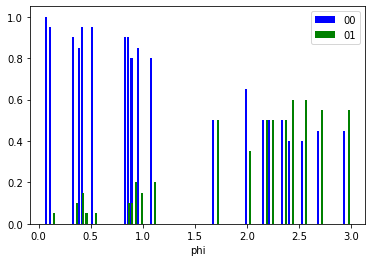

In [5]:
measurements = pickle.load(open ('measurement_circ_1_inder.pk','rb'))
meas_00 = np.array([])
meas_01 = np.array([])
phi = np.array([])
for measurement in measurements:
    if '00' not in measurement.keys():
        meas_00 = np.append(meas_00, 0)
    else:
        meas_00 = np.append(meas_00, measurement['00'])
    if '01' not in measurement.keys():
        meas_01= np.append(meas_01, 0)
    else:
        meas_01= np.append(meas_01, measurement['01'])
    phi = np.append(phi, measurement['phi'])
    
ax = plt.subplot(111)
#Normalizing measurements to get probabilities
ax.bar(phi-0.02, meas_00/20.0, width=0.02, color='b', align='center', label='00')
ax.bar(phi+0.02, meas_01/20.0, width=0.02, color='g', align='center', label='01')
ax.legend()
ax.set_xlabel('phi')
plt.show();

Now we destroy the interference by entangling the qubits

In [33]:
%%capture
qreg_q = QuantumRegister(2, 'q');
creg_c = ClassicalRegister(2, 'c');

measurements = []
for i, phase in enumerate(phi):
    circuit = QuantumCircuit(qreg_q, creg_c);

    circuit.reset(qreg_q[0]);
    circuit.h(qreg_q[0]);
    circuit.rz(phase, qreg_q[0]);
    circuit.cx(qreg_q[0], qreg_q[1]);
    circuit.h(qreg_q[0]);
    circuit.measure(qreg_q[0], creg_c[0]);
    circuit.measure(qreg_q[1], creg_c[1]);
    if i==0: # We draw the circuit once
        circuit_1 = qiskit.visualization.circuit_drawer(circuit);
    execution = qiskit.execute(circuit, backend, shots=8);
    data = dict(execution.result().get_counts());
    data.update({'phi': phase});
    measurements.append(data);

In [34]:
print('This is a circuit with one of the multiple phases we are implementing:\n')
print(circuit_1)

This is a circuit with one of the multiple phases we are implementing:

          ┌───┐┌────────────┐     ┌───┐┌─┐
q_0: ─|0>─┤ H ├┤ RZ(2.5447) ├──■──┤ H ├┤M├
          └───┘└────────────┘┌─┴─┐└┬─┬┘└╥┘
q_1: ────────────────────────┤ X ├─┤M├──╫─
                             └───┘ └╥┘  ║ 
c: 2/═══════════════════════════════╩═══╩═
                                    1   0 


In [35]:
measurements

[{'00': 1, '01': 1, '10': 3, '11': 3, 'phi': 2.5446900494077322},
 {'00': 2, '01': 1, '10': 3, '11': 2, 'phi': 0.43982297150257105}]

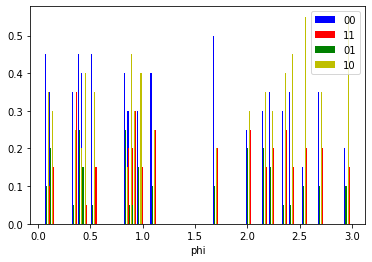

In [7]:
measurements = pickle.load(open ('measurement_circ_2_inder.pk','rb'))
meas_00 = np.array([])
meas_01 = np.array([])
meas_10 = np.array([])
meas_11 = np.array([])
phi = np.array([])
for measurement in measurements:
    if '00' not in measurement.keys():
        meas_00 = np.append(meas_00, 0)
    else:
        meas_00 = np.append(meas_00, measurement['00'])
    if '01' not in measurement.keys():
        meas_01= np.append(meas_01, 0)
    else:
        meas_01= np.append(meas_01, measurement['01'])
    if '10' not in measurement.keys():
        meas_10= np.append(meas_10, 0)
    else:
        meas_10= np.append(meas_10, measurement['10'])
    if '11' not in measurement.keys():
        meas_11= np.append(meas_11, 0)
    else:
        meas_11= np.append(meas_11, measurement['11'])
    phi = np.append(phi, measurement['phi'])
    
ax = plt.subplot(111)
ax.bar(phi-0.02, meas_00/20.0, width=0.01, color='b', align='center', label='00')
ax.bar(phi+0.02, meas_11/20.0, width=0.01, color='r', align='center', label='11')
ax.bar(phi-0.01, meas_01/20.0, width=0.01, color='g', align='center', label='01')
ax.bar(phi+0.01, meas_10/20.0, width=0.01, color='y', align='center', label='10')
ax.legend()
ax.set_xlabel('phi')
plt.show();

Now we place the H gate as quantum eraser

Here is where things get tricky, and the reason why in the previous circuits there were measurements for both qubits. It is clear that to see the interference pattern of a double slit, we would need to do that measurement, thus why measuring q_1 is necessary.

Why? Because in the previous circuit, for each shot, when we measure we are determining the projection of q_1 in the [|0>, |1>] basis, which is the same as saying we knew the slit.

Now, after placing a H in the q_1, and measuring the system when it has moved to the [|+>,|->] base, that knowledge is lost. However, if we did not measure q_1, it would get the result for both possibilities, rendering a Prob_|0> = 1/4 (1 + cos(Phi)) + 1/4(1-cos(Phi)) = 1/2, thus adding the interference patterns of the possibilities given by q_1 into one indistinguishable spot.

In [37]:
%%capture

qreg_q = QuantumRegister(2, 'q');
creg_c = ClassicalRegister(2, 'c');

measurements = []
for i, phase in enumerate(phi):
    circuit = QuantumCircuit(qreg_q, creg_c);

    circuit.reset(qreg_q[0]);
    circuit.h(qreg_q[0]);
    circuit.rz(phase, qreg_q[0]);
    circuit.cx(qreg_q[0], qreg_q[1]);
    circuit.h(qreg_q[0]);
    circuit.h(qreg_q[1]);
    circuit.measure(qreg_q[0], creg_c[0]);
    circuit.measure(qreg_q[1], creg_c[1]);
    if i==0: # We draw the circuit once
        circuit_1 = qiskit.visualization.circuit_drawer(circuit);
    execution = qiskit.execute(circuit, backend, shots=8);
    data = dict(execution.result().get_counts());
    data.update({'phi': phase});
    measurements.append(data);

In [38]:
print('This is a circuit with one of the multiple phases we are implementing:\n')
print(circuit_1)

This is a circuit with one of the multiple phases we are implementing:

          ┌───┐┌────────────┐     ┌───┐┌─┐   
q_0: ─|0>─┤ H ├┤ RZ(2.5447) ├──■──┤ H ├┤M├───
          └───┘└────────────┘┌─┴─┐├───┤└╥┘┌─┐
q_1: ────────────────────────┤ X ├┤ H ├─╫─┤M├
                             └───┘└───┘ ║ └╥┘
c: 2/═══════════════════════════════════╩══╩═
                                        0  1 


In [39]:
measurements

[{'00': 2, '01': 4, '10': 2, 'phi': 2.5446900494077322},
 {'00': 4, '10': 1, '11': 3, 'phi': 0.43982297150257105}]

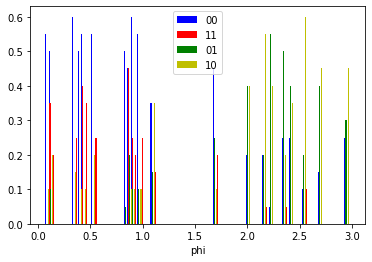

In [8]:
measurements = pickle.load(open ('measurement_circ_3_inder.pk','rb'))
meas_00 = np.array([])
meas_01 = np.array([])
meas_10 = np.array([])
meas_11 = np.array([])
phi = np.array([])
for measurement in measurements:
    if '00' not in measurement.keys():
        meas_00 = np.append(meas_00, 0)
    else:
        meas_00 = np.append(meas_00, measurement['00'])
    if '01' not in measurement.keys():
        meas_01= np.append(meas_01, 0)
    else:
        meas_01= np.append(meas_01, measurement['01'])
    if '10' not in measurement.keys():
        meas_10= np.append(meas_10, 0)
    else:
        meas_10= np.append(meas_10, measurement['10'])
    if '11' not in measurement.keys():
        meas_11= np.append(meas_11, 0)
    else:
        meas_11= np.append(meas_11, measurement['11'])
    phi = np.append(phi, measurement['phi'])
    
ax = plt.subplot(111)
ax.bar(phi-0.02, meas_00/20.0, width=0.01, color='b', align='center', label='00')
ax.bar(phi+0.02, meas_11/20.0, width=0.01, color='r', align='center', label='11')
ax.bar(phi-0.01, meas_01/20.0, width=0.01, color='g', align='center', label='01')
ax.bar(phi+0.01, meas_10/20.0, width=0.01, color='y', align='center', label='10')
ax.legend()
ax.set_xlabel('phi')
plt.show();

In [41]:
print('THE END')

THE END
